In [4]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud  
from PIL import Image
from joblib import load

In [2]:
!wget https://www.dropbox.com/s/ev6ylo08fv0g70h/lr_0_0.joblib?dl=1
!wget https://www.dropbox.com/s/jepxzzyd982ef3n/tfidf_0_0.pkl?dl=1

--2020-06-28 04:04:09--  https://www.dropbox.com/s/ev6ylo08fv0g70h/lr_0_0.joblib?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ev6ylo08fv0g70h/lr_0_0.joblib [following]
--2020-06-28 04:04:09--  https://www.dropbox.com/s/dl/ev6ylo08fv0g70h/lr_0_0.joblib
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfb7075f7365015c12deba3820f.dl.dropboxusercontent.com/cd/0/get/A6fR8fMUQFI7Rah8yL6Tb6oVtBnOedX1Uh9TUJ6nsgvY70BELh3bYE2Zl9QyitRoQ-ZVvf3D1HI-YIpqM-Kyl7hLZp7v6wmBTwf9Wq0JeMFJJo1xYb5LPq0Wcd2rJ7-BNT4/file?dl=1# [following]
--2020-06-28 04:04:10--  https://ucfb7075f7365015c12deba3820f.dl.dropboxusercontent.com/cd/0/get/A6fR8fMUQFI7Rah8yL6Tb6oVtBnOedX1Uh9TUJ6nsgvY70BELh3bYE2Zl9QyitRoQ-ZVvf3D1HI-YIpqM-Kyl7hLZp7v6wmBTwf9Wq0JeMFJJ

In [5]:
model = load('lr_0_0.joblib?dl=1')
tfidf_vectorizer = load('tfidf_0_0.pkl?dl=1')

In [7]:
feature_names_tfidf = tfidf_vectorizer.get_feature_names()
sorted_features = sorted(zip(feature_names_tfidf, np.sum(model.coef_, axis=0)), reverse=True, key=lambda x: x[1])
sorted_features = sorted_features[:100]

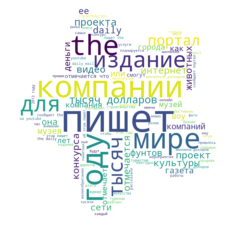

In [9]:
dict_features = {word:coef for word, coef in sorted_features}
form_mask = np.array(Image.open('image_mask.jpg'))
cloud = WordCloud(background_color="white", max_words=100, mask=form_mask)
cloud.generate_from_frequencies(dict_features) 
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cloud.to_file("cloud_0_0.png")